In [1]:
import sys
# Make Python see the project root so we can import src.* modules
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

project_root

'd:\\10Academy\\week_4\\CreditRiskProbability_week4'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from src.data_processing import convert_transaction_time

In [3]:
df = pd.read_csv('../data/raw/data.csv')

In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


##### number of  rows and columns

In [5]:
df.shape

(95662, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [10]:
comparison = df['Value'] == df['Amount'].abs()
comparison.value_counts()

True     93097
False     2565
Name: count, dtype: int64

In [12]:
df = convert_transaction_time(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [13]:
df[['Amount', 'Value']].describe()

,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


## 📊 Analysis of Financial Summary Statistics

This section interprets the descriptive statistics for `Amount` and `Value` to identify key characteristics relevant for credit risk modeling.

| Statistic | Amount | Value | Key Interpretation for Credit Risk |
| :--- | :--- | :--- | :--- |
| **Count** | 95,662 | 95,662 | Confirms the total number of transactions. |
| **Mean** | 6,717.85 | 9,900.58 | Mean is significantly higher than the median, signaling high right-skewness due to outliers. |
| **Std Dev** | 123,306.8 | 123,122.1 | High standard deviation relative to the mean confirms extreme variability. |
| **Min** | **-1,000,000** | 2.00 | Confirms the presence of **credits** (negative `Amount`) up to 1 million. |
| **50% (Median)**| 1,000.00 | 1,000.00 | Half of all transactions are $\le 1,000$. The median is much lower than the mean, indicating strong skewness. |
| **Max** | 9,880,000 | 9,880,000 | Confirms extreme positive outliers (spending up to $\approx 9.9$ million). |

---

### 💡 Key Takeaways for Feature Engineering

1.  **Extreme Skewness in Monetary Data:** The large disparity between the Mean and Median for `Value` indicates a highly skewed distribution. This requires handling to prevent outliers from dominating the model.
    * **Action:** The `Monetary` RFM metric will require a **logarithmic transformation** (e.g., `np.log(M)`) before being used in modeling. 

2.  **Separate Credit and Debit Flows:** The `Amount` field contains both positive (debits/purchases) and negative (credits/refunds) transactions.
    * **Action:** When calculating features, we must create separate customer-level aggregations for **Total Debit Amount** and **Total Credit Amount** to capture the full picture of spending vs. funds coming in.



### Distribution of Numerical Features

#### Histogram of the Full Range (for Confirmation)
We plot the histogram to visually confirm the extreme skewness.

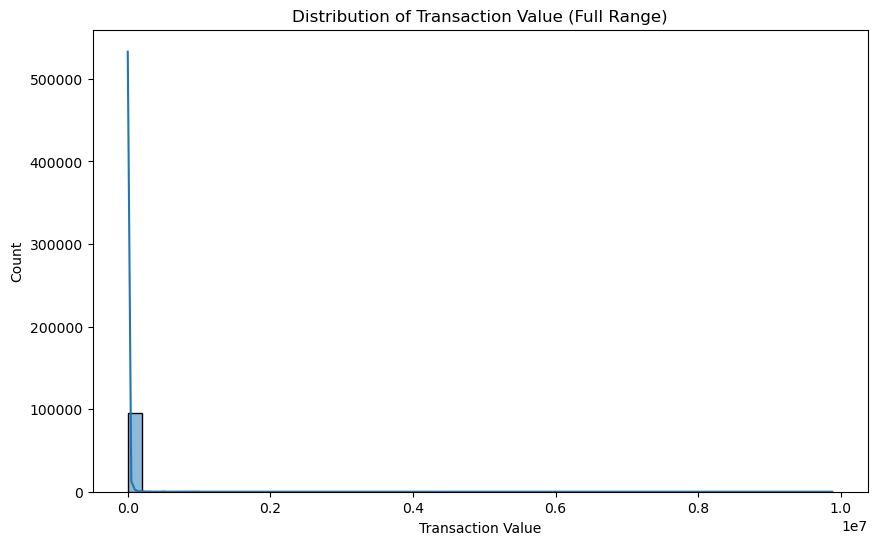

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Transaction Value (Full Range)')
plt.xlabel('Transaction Value')
plt.ylabel('Count')
plt.show()

#### Histogram of the Majority of Transactions (Zoomed In)
To see patterns in the non-outlier data, we zoom in on the lower 99% of values (e.g., up to the 99th percentile).

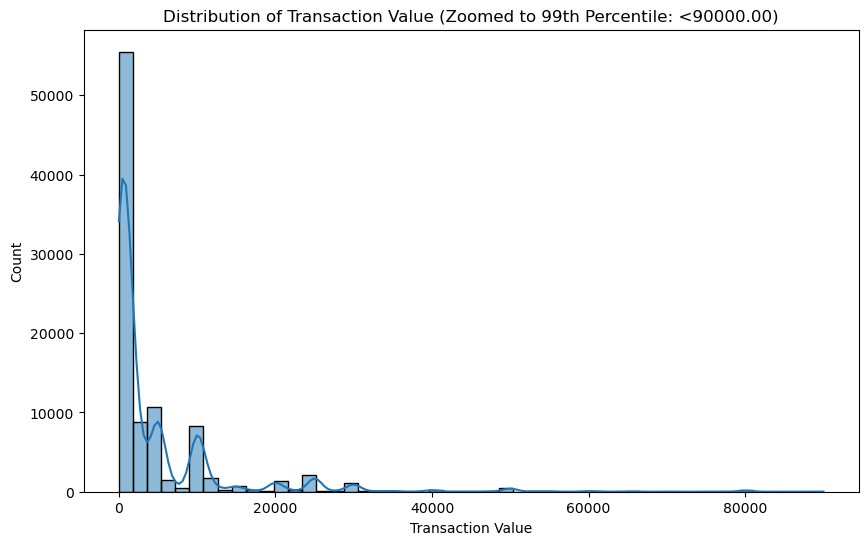

In [16]:
# Find the 99th percentile value to set the x-limit
value_99th_percentile = df['Value'].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Value'] <= value_99th_percentile]['Value'], bins=50, kde=True)
plt.title(f'Distribution of Transaction Value (Zoomed to 99th Percentile: <{value_99th_percentile:.2f})')
plt.xlabel('Transaction Value')
plt.ylabel('Count')
plt.show()

#### Analyze Transaction Amount (Credit vs. Debit)
To understand the balance of spending (positive) versus incoming funds (negative), we use a histogram centered around zero.

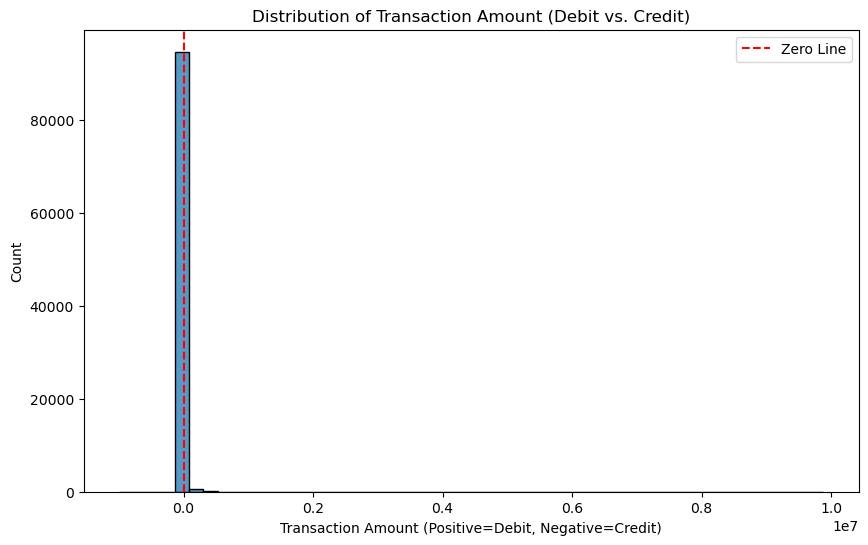

In [17]:
plt.figure(figsize=(10, 6))
# Plotting the raw Amount to see the positive (debit) and negative (credit) transactions
sns.histplot(df['Amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amount (Debit vs. Credit)')
plt.xlabel('Transaction Amount (Positive=Debit, Negative=Credit)')
plt.ylabel('Count')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.legend()
plt.show()

#### PricingStrategy

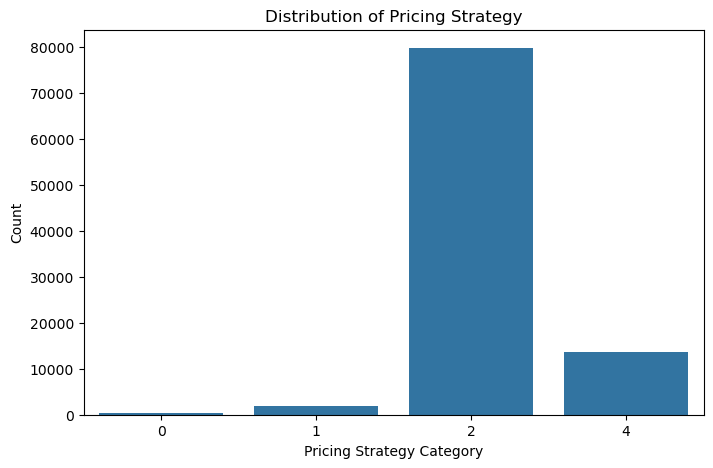

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PricingStrategy', data=df)
plt.title('Distribution of Pricing Strategy')
plt.xlabel('Pricing Strategy Category')
plt.ylabel('Count')
plt.show()

## 📊 Analysis of Visualized Feature Distributions

The visualizations confirm the structural issues (skewness, imbalance) in the financial data and dictate critical steps for feature engineering.

### 1. Transaction Value (Monetary Feature)

| Plot | Observation | Implication for Modeling |
| :--- | :--- | :--- |
| **Full Range** | Confirms extreme outliers, compressing nearly all data near zero. | **Extreme Outliers Confirmed.** The outliers are massive, dominating the distribution. |
| **Zoomed In (99th Pct.)** | Distribution is highly **right-skewed** 

[Image of a highly right-skewed statistical distribution]
, with the bulk of transactions $\le 5,000$. Secondary peaks exist around 10,000 and 20,000. | **Log Transformation Required.** The resulting `Monetary (M)` feature *must* be log-transformed (e.g., `np.log(M)`) to stabilize variance and prevent outliers from unduly influencing the model. |

### 2. Transaction Amount (Debit vs. Credit)

| Plot | Observation | Implication for Modeling |
| :--- | :--- | :--- |
| **Debit vs. Credit** | The massive peak is to the right of the Zero Line (Positive = Debits/Purchases). The smaller cluster to the left represents Credits (incoming funds). | **Dominance of Debits.** Spending (debits) is far more frequent and typically larger than incoming funds/refunds (credits). |
| **Actionable Insight** | The distinct pattern for positive and negative amounts. | **Separate Feature Creation is Crucial.** We must create distinct customer-level features: **Total Debit Amount** and **Total Credit Amount**. Using only the net or absolute value would hide this vital behavioral risk signal. |

### 3. Pricing Strategy

| Plot | Observation | Implication for Modeling |
| :--- | :--- | :--- |
| **Distribution** | Category **2** is overwhelming dominant ($\approx 80,000$ transactions). Categories **0** and **1** are negligible. | **High Feature Imbalance.** The model will not learn meaningful differences from the rare categories. |
| **Actionable Insight** | Severe imbalance for categories 0 and 1. | **Feature Grouping/Binning.** Grouping low-frequency categories (0, 1, etc.) into an 'Other' category will reduce dimensionality and prevent the creation of highly sparse, uninformative dummy variables during one-hot encoding. |



#### Visualize Dominant Categories (Top N)

C:\Users\hp\AppData\Local\Temp\ipykernel_3344\4136110526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


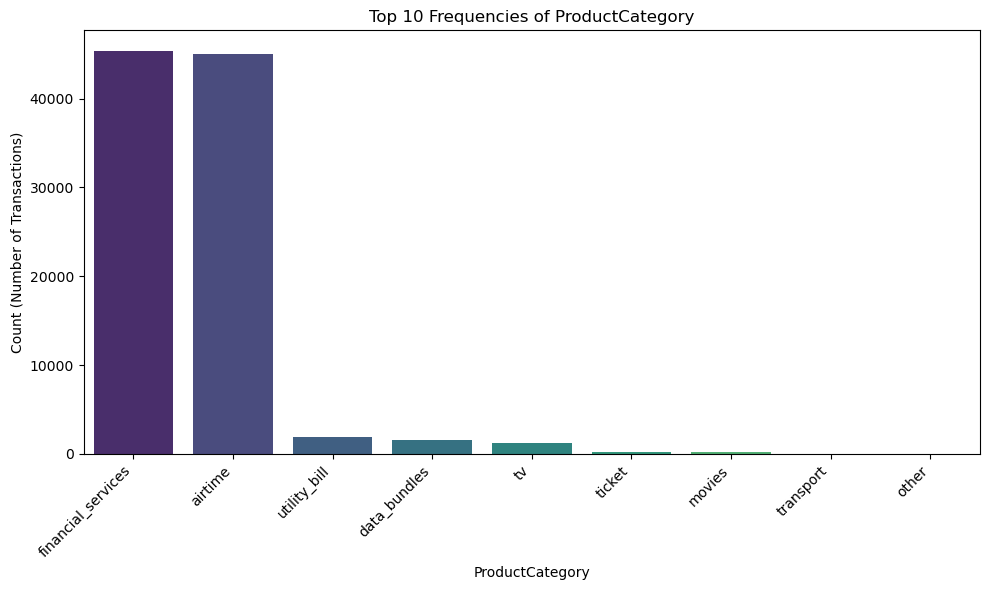

C:\Users\hp\AppData\Local\Temp\ipykernel_3344\4136110526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


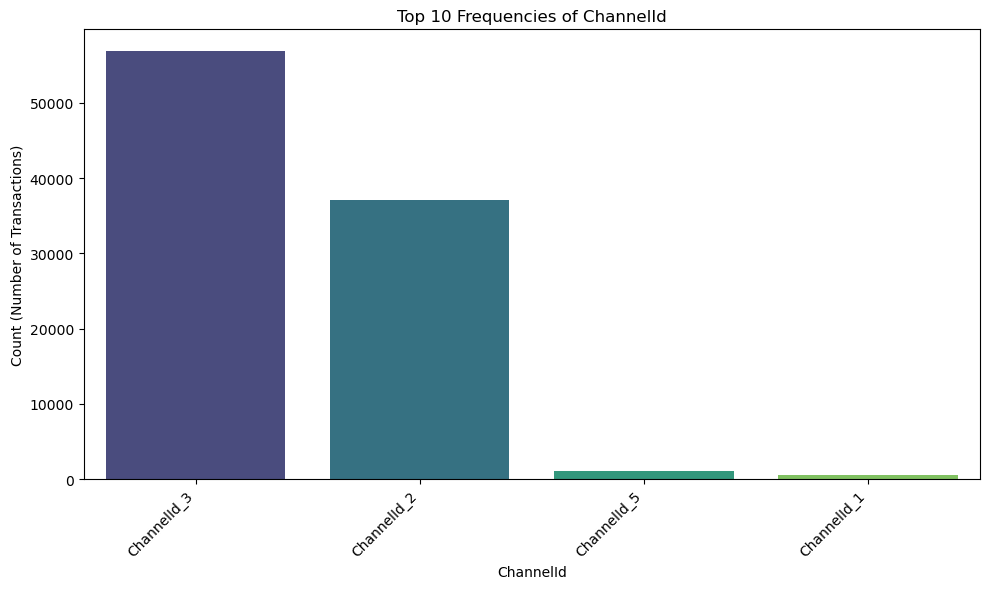

C:\Users\hp\AppData\Local\Temp\ipykernel_3344\4136110526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


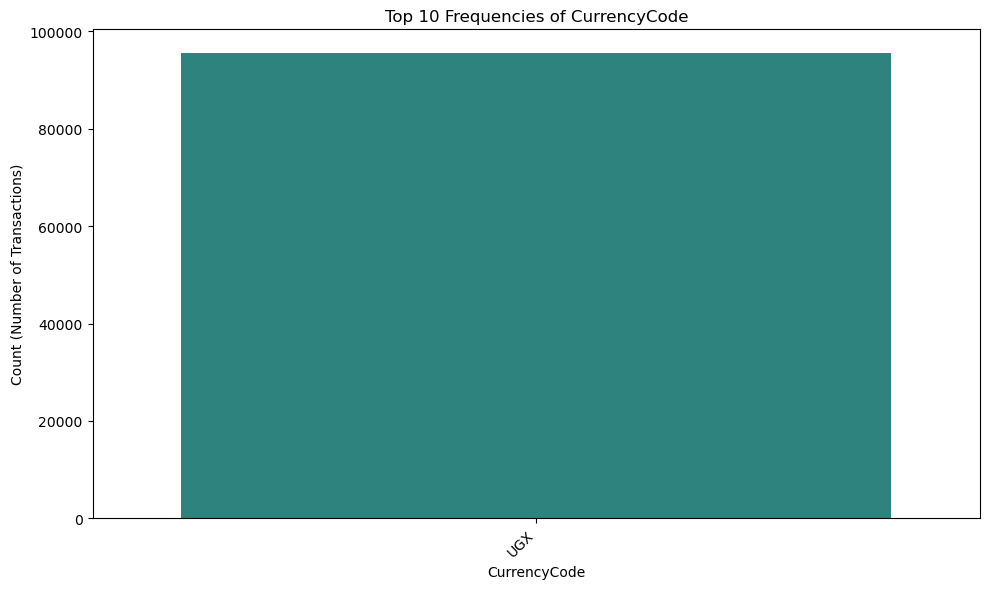

C:\Users\hp\AppData\Local\Temp\ipykernel_3344\4136110526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")


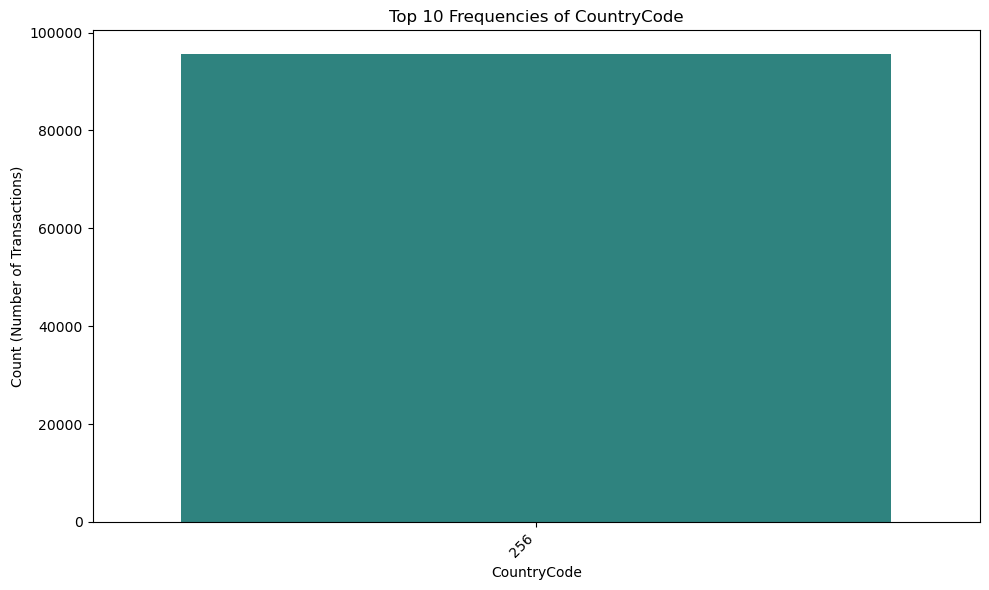

In [19]:
# Columns to analyze for frequency
categorical_cols = ['ProductCategory', 'ChannelId', 'CurrencyCode', 'CountryCode']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Calculate the top 10 categories
    top_n = df[col].value_counts().nlargest(10)

    # Create a bar plot
    sns.barplot(x=top_n.index, y=top_n.values, palette="viridis")
    
    plt.title(f'Top 10 Frequencies of {col}')
    plt.xlabel(col)
    plt.ylabel('Count (Number of Transactions)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout()
    plt.show()

In [22]:
# Select the relevant numerical columns for correlation analysis
numeric_cols = ['Amount', 'Value', 'FraudResult', 'PricingStrategy']
correlation_matrix = df[numeric_cols].corr()

print("\n--- Correlation Matrix (r-values) ---")
print(correlation_matrix)


--- Correlation Matrix (r-values) ---
                   Amount     Value  FraudResult  PricingStrategy
Amount           1.000000  0.989692     0.557370        -0.061931
Value            0.989692  1.000000     0.566739        -0.017020
FraudResult      0.557370  0.566739     1.000000        -0.033821
PricingStrategy -0.061931 -0.017020    -0.033821         1.000000


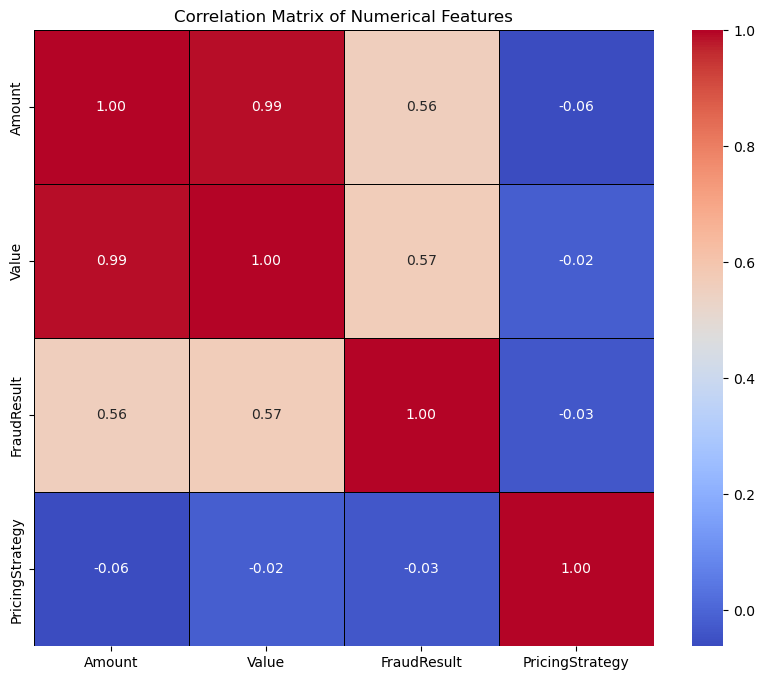

In [23]:
plt.figure(figsize=(10, 8))
# Create the heatmap, annotating with the r-values
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 🔗 Analysis of Correlation Matrix

The correlation matrix provides vital quantitative insights into the linear relationships between the numerical features, which is essential for feature selection (Deliverable 2).

| | Amount | Value | FraudResult | PricingStrategy |
| :--- | :--- | :--- | :--- | :--- |
| **Amount** | 1.00 | 0.99 | 0.56 | -0.06 |
| **Value** | 0.99 | 1.00 | 0.57 | -0.02 |
| **FraudResult** | 0.56 | 0.57 | 1.00 | -0.03 |
| **PricingStrategy**| -0.06 | -0.02 | -0.03 | 1.00 |

### 1. Multicollinearity Check (Predictor vs. Predictor)

* **Amount vs. Value ($r=0.989692$):** This extremely high positive correlation indicates severe **multicollinearity**. This confirms the initial hypothesis that `Value` is functionally the absolute version of `Amount` for most transactions.
    * **Actionable Insight:** In the final credit scoring model, we should **not** include both `Amount` and `Value` as separate features, as they carry the same information and could destabilize the model coefficients. Instead, we should use `Value` for the RFM Monetary calculation and use `Amount` to derive the debit/credit features, then drop the raw `Amount` column.

### 2. Relationship with the Target Proxy (`FraudResult`)

* **Value vs. FraudResult ($r=0.566739$):** There is a **strong positive correlation** between transaction value and fraud outcome.
* **Amount vs. FraudResult ($r=0.557370$):** This is also a strong positive correlation, confirming the above.
    * **Actionable Insight:** The single most important financial predictor of fraud (and thus, proxy for risk) is **transaction size**. This means that the aggregated customer Monetary features (M component of RFM) will be highly predictive of risk in the final model.

* **PricingStrategy vs. FraudResult ($r=-0.033821$):** This correlation is extremely close to zero.
    * **Actionable Insight:** There is **no significant *linear* relationship** between the numerical category of the pricing strategy and the incidence of fraud. We should still use `PricingStrategy` as a categorical feature, but we do not expect its numerical value to be a strong predictor.

### 3. Conclusion on Numerical Features

The analysis strongly supports prioritizing the creation of **Monetary-based features** (Total Value, Total Debits, Total Credits) as they have the highest predictive power for risk. The next step is to use these financial features, along with Recency and Frequency, to create the final **RFM Proxy Variable.**

### Outlier Detection

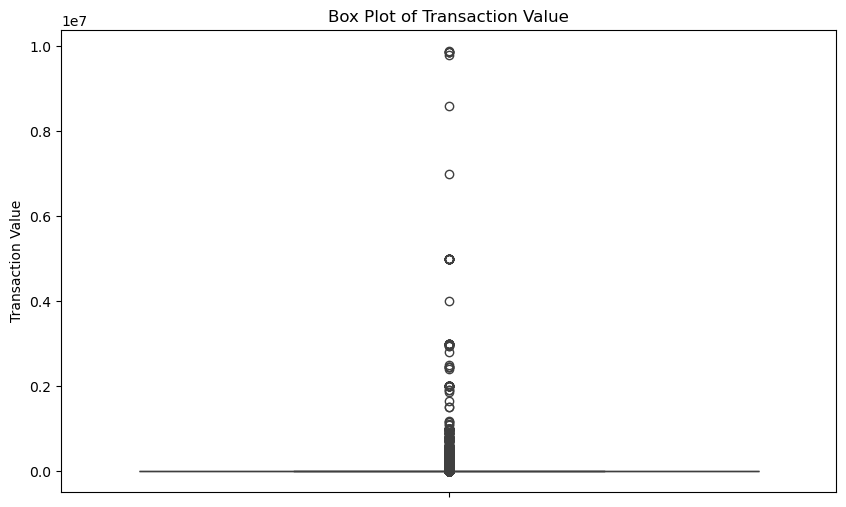

In [24]:
plt.figure(figsize=(10, 6))
# A box plot is ideal for showing the distribution across quartiles and outliers
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Transaction Value')
plt.ylabel('Transaction Value')
plt.show()

In [25]:
# Code to determine the threshold for extreme outliers (optional capping)
# Calculate the 99.9th percentile
outlier_threshold = df['Value'].quantile(0.999)

print(f"\n--- Extreme Outlier Threshold ---")
print(f"99.9th Percentile Value: {outlier_threshold:,.2f}")
print("Values above this threshold could be capped, but log transformation is preferred.")


--- Extreme Outlier Threshold ---
99.9th Percentile Value: 1,000,000.00
Values above this threshold could be capped, but log transformation is preferred.


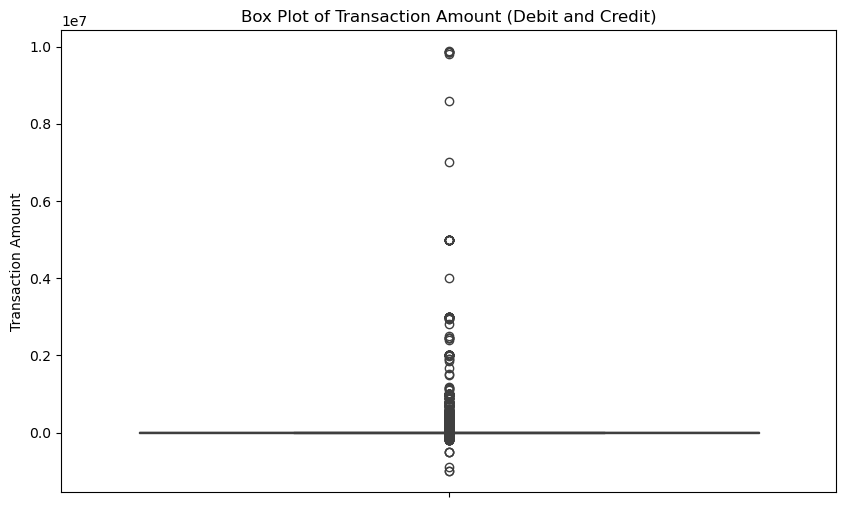

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Transaction Amount (Debit and Credit)')
plt.ylabel('Transaction Amount')
plt.show()

In [27]:
# Define the column to use for outlier detection (Amount)
outlier_col = 'Amount'

# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_amount = df[outlier_col].quantile(0.25)
Q3_amount = df[outlier_col].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR_amount = Q3_amount - Q1_amount

# 3. Define the upper and lower bounds for outlier exclusion
# Outliers are defined as 1.5 * IQR outside of Q1 and Q3
lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount

# 4. Create a filtered DataFrame excluding the outliers
# We will use 'df_cleaned' for the final working DataFrame after this step
df_cleaned = df[
    (df[outlier_col] >= lower_bound_amount) &
    (df[outlier_col] <= upper_bound_amount)
]

# Report the results
rows_removed_amount = len(df) - len(df_cleaned)

print(f"--- Outlier Removal Results for {outlier_col} ---")
print(f"Original Row Count: {len(df)}")
print(f"Lower Bound for Outlier Exclusion: {lower_bound_amount:,.2f}")
print(f"Upper Bound for Outlier Exclusion: {upper_bound_amount:,.2f}")
print(f"Filtered Row Count: {len(df_cleaned)}")
print(f"Total Rows Removed: {rows_removed_amount} ({rows_removed_amount / len(df) * 100:.2f}%)")

# The variable 'df_cleaned' is now your working dataset.
# The original 'df' is preserved if you need to compare.

--- Outlier Removal Results for Amount ---
Original Row Count: 95662
Lower Bound for Outlier Exclusion: -4,325.00
Upper Bound for Outlier Exclusion: 7,075.00
Filtered Row Count: 71221
Total Rows Removed: 24441 (25.55%)


In [29]:
df_cleaned.to_csv('../data/processed/data_cleaned.csv', index=False)